<a href="https://colab.research.google.com/github/Oumayma-O/Hyperspectral-Images-Classification/blob/main/hyperspectral_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

datasets_folder_path = '/content/drive/MyDrive/hyperspectral-image-classification-project/datasets'

indian_pines_path = os.path.join(datasets_folder_path, 'IN', 'Indian_pines_corrected.mat')
indian_pines_gt_path = os.path.join(datasets_folder_path, 'IN', 'Indian_pines_gt.mat')

pavia_centre_path = os.path.join(datasets_folder_path, 'PC', 'Pavia.mat')
pavia_centre_gt_path = os.path.join(datasets_folder_path, 'PC', 'Pavia_gt.mat')

pavia_university_path = os.path.join(datasets_folder_path, 'UP', 'PaviaU.mat')
pavia_university_gt_path = os.path.join(datasets_folder_path, 'UP', 'PaviaU_gt.mat')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io as sio

indian_pines_data = sio.loadmat(indian_pines_path)['indian_pines_corrected']
indian_pines_gt = sio.loadmat(indian_pines_gt_path)['indian_pines_gt']

pavia_centre_data = sio.loadmat(pavia_centre_path)['pavia']
pavia_centre_gt = sio.loadmat(pavia_centre_gt_path)['pavia_gt']

pavia_university_data = sio.loadmat(pavia_university_path)['paviaU']
pavia_university_gt = sio.loadmat(pavia_university_gt_path)['paviaU_gt']


# Data Visualization

In [ ]:
datasets = [(indian_pines_data, indian_pines_gt, "Indian Pines"),
            (pavia_centre_data, pavia_centre_gt, "Pavia Centre"),
            (pavia_university_data, pavia_university_gt, "Pavia University")]

print(indian_pines_data.shape)
print(indian_pines_gt.shape)
print(pavia_centre_data.shape)
print(pavia_centre_gt.shape)
print(pavia_university_data.shape)
print(pavia_university_gt.shape)

(145, 145, 200)
(145, 145)
(1096, 715, 102)
(1096, 715)
(610, 340, 103)
(610, 340)


### Datasets Info

In [ ]:
import numpy as np

def visualize_dataset_info(dataset_name, dataset, ground_truth):
    print(f"Dataset: {dataset_name}")
    print(f"Dimensions (width, height, bands): {dataset.shape}")
    print(f"Number of Bands: {dataset.shape[2]}")
    print(f"Ground Truth Classes: {np.unique(ground_truth)}")
    print()

In [ ]:
for dataset, ground_truth, dataset_name in datasets:
    visualize_dataset_info(dataset_name, dataset, ground_truth)

Dataset: Indian Pines
Dimensions (width, height, bands): (145, 145, 200)
Number of Bands: 200
Ground Truth Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]

Dataset: Pavia Centre
Dimensions (width, height, bands): (1096, 715, 102)
Number of Bands: 102
Ground Truth Classes: [0 1 2 3 4 5 6 7 8 9]

Dataset: Pavia University
Dimensions (width, height, bands): (610, 340, 103)
Number of Bands: 103
Ground Truth Classes: [0 1 2 3 4 5 6 7 8 9]



In [ ]:
import pandas as pd

for X, y, dataset_name in datasets:
    print(f"Dataset: {dataset_name}")
    # Get unique class names based on ground truth labels for the current dataset
    class_names = np.unique(y)
    # Calculate the number of samples for each class
    summary = pd.DataFrame([{'class_name': label, 'samples': np.sum(y == val)} for val, label in enumerate(class_names)])
    print(summary)

Dataset: Indian Pines
    class_name  samples
0            0    10776
1            1       46
2            2     1428
3            3      830
4            4      237
5            5      483
6            6      730
7            7       28
8            8      478
9            9       20
10          10      972
11          11     2455
12          12      593
13          13      205
14          14     1265
15          15      386
16          16       93
Dataset: Pavia Centre
   class_name  samples
0           0   635488
1           1    65971
2           2     7598
3           3     3090
4           4     2685
5           5     6584
6           6     9248
7           7     7287
8           8    42826
9           9     2863
Dataset: Pavia University
   class_name  samples
0           0   164624
1           1     6631
2           2    18649
3           3     2099
4           4     3064
5           5     1345
6           6     5029
7           7     1330
8           8     3682
9           9  

### HSI Data (Band 50)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

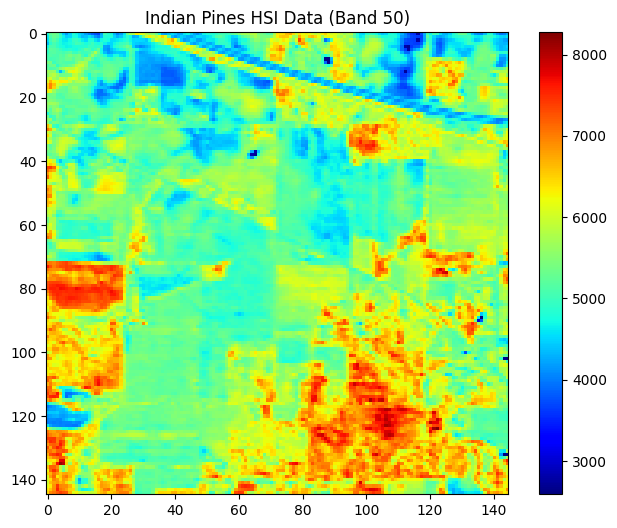

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(indian_pines_data[:,:,50], cmap='jet')
plt.title('Indian Pines HSI Data (Band 50)')
plt.colorbar()
plt.show()


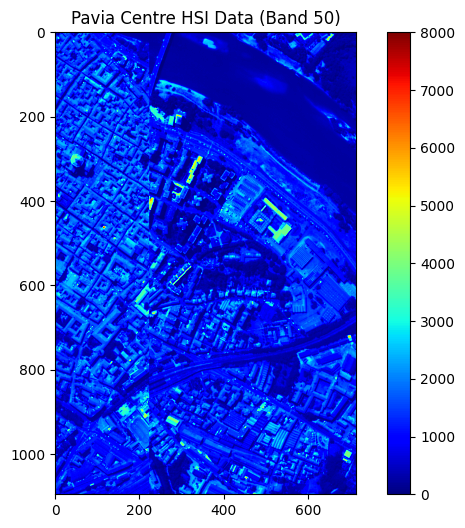

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(pavia_centre_data[:,:,50], cmap='jet')
plt.title('Pavia Centre HSI Data (Band 50)')
plt.colorbar()
plt.show()

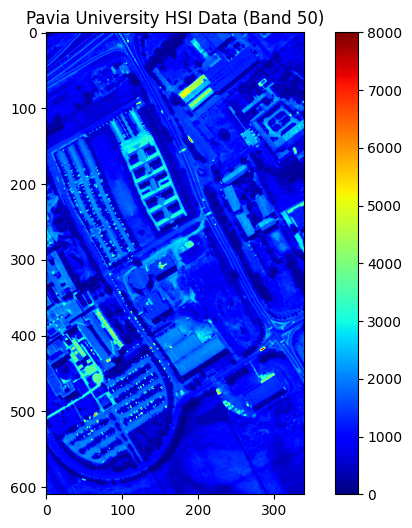

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(pavia_university_data[:,:,50], cmap='jet')
plt.title('Pavia University HSI Data (Band 50)')
plt.colorbar()
plt.show()

### Visualize selected bands

In [ ]:

def visualize_selected_bands(dataset_name, dataset, band_indices):
    num_bands_to_visualize = len(band_indices)
    num_plots = num_bands_to_visualize // 5 + (1 if num_bands_to_visualize % 5 != 0 else 0)
    fig, axes = plt.subplots(num_plots, 5, figsize=(20, num_plots * 4))
    fig.suptitle(f'Visualizing Selected Bands for {dataset_name} Dataset', fontsize=16)
    if num_plots == 1:
        axes = [axes]
    for i, band_idx in enumerate(band_indices):
        row_idx = i // 5
        col_idx = i % 5
        axes[row_idx][col_idx].imshow(dataset[:,:,band_idx], cmap='jet')
        axes[row_idx][col_idx].set_title(f'Band {band_idx}')
    plt.tight_layout()
    plt.show()


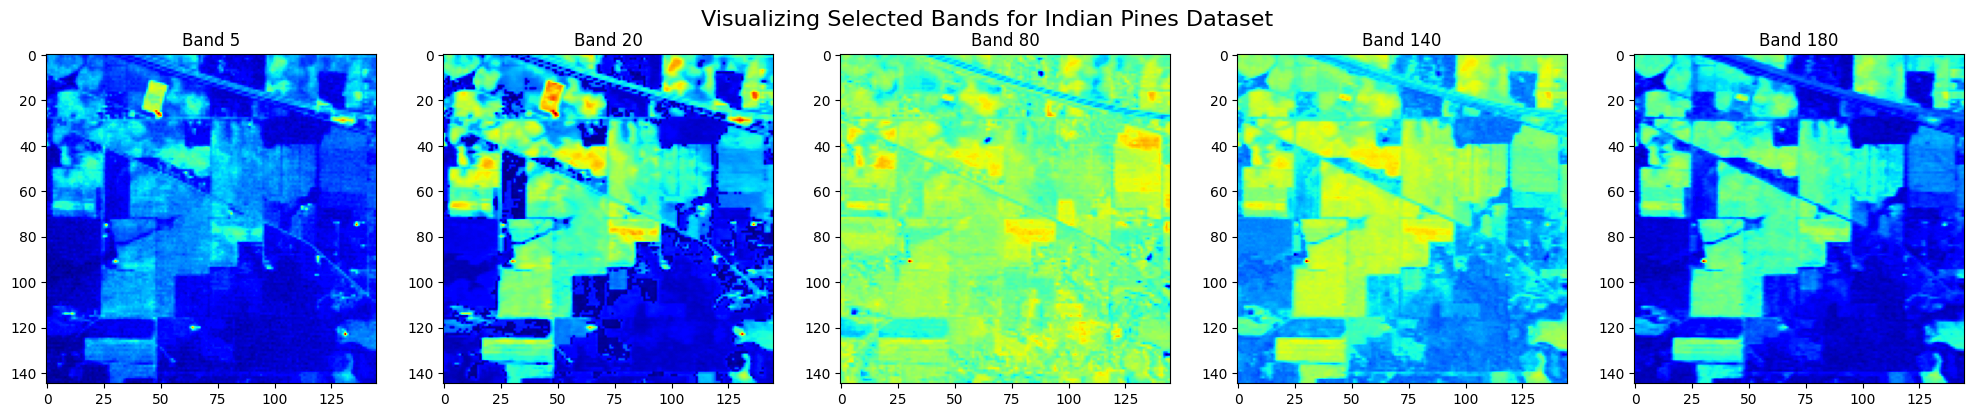

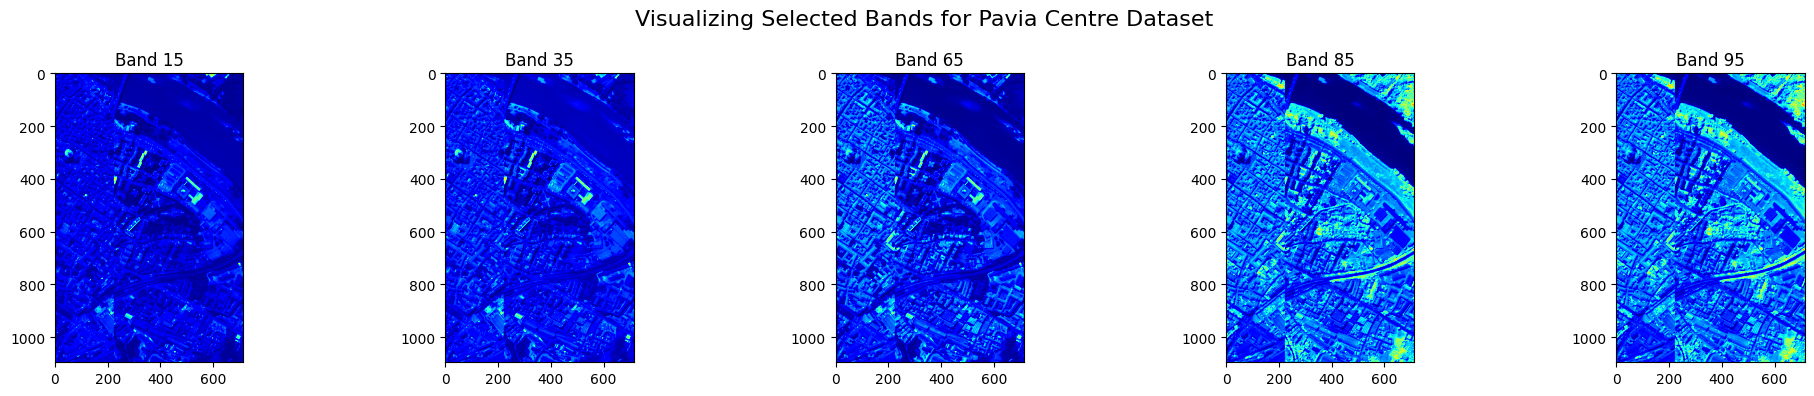

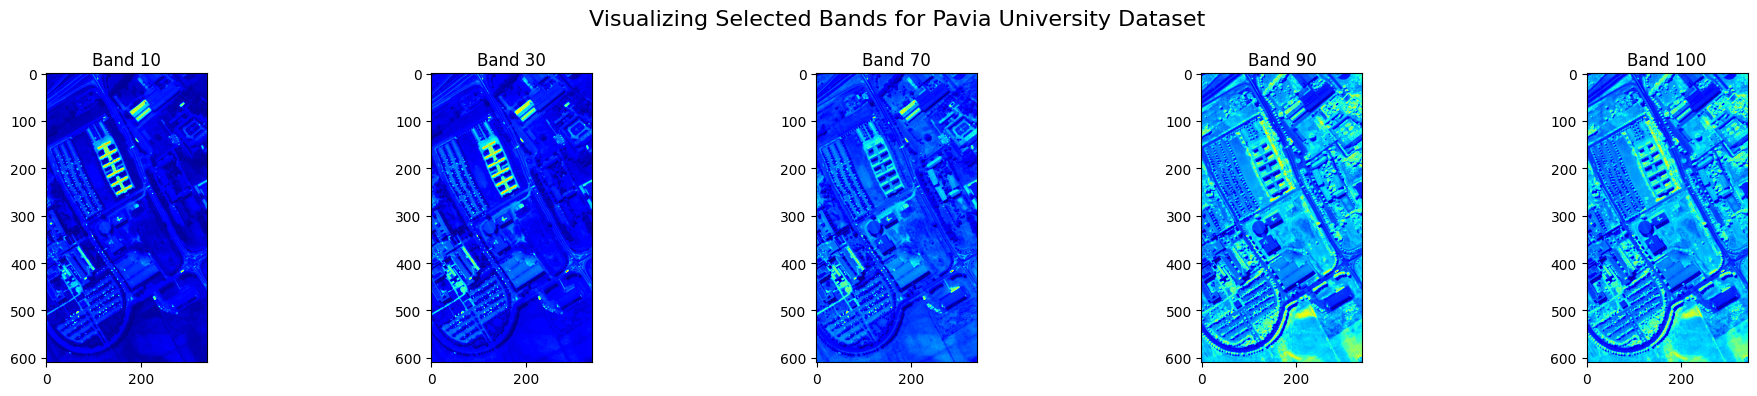

In [ ]:
indian_pines_selected_bands = [5, 20, 80, 140, 180]
pavia_centre_selected_bands = [15, 35, 65, 85, 95]
pavia_university_selected_bands = [10, 30, 70, 90, 100]

visualize_selected_bands("Indian Pines", indian_pines_data, indian_pines_selected_bands)

visualize_selected_bands("Pavia Centre", pavia_centre_data, pavia_centre_selected_bands)

visualize_selected_bands("Pavia University", pavia_university_data, pavia_university_selected_bands)

### Ground-Truth Image

Ground truth images are reference images where each pixel is manually labeled with the correct category or class it belongs to, such as vegetation, water, or buildings. These labeled images are used to train and evaluate algorithms for tasks like classification and segmentation by providing a benchmark against which algorithm predictions can be compared.







In [ ]:
def visualize_ground_truth(dataset_name, ground_truth):
    plt.figure(figsize=(8, 6))
    plt.imshow(ground_truth, cmap='jet')
    plt.title(f'Ground Truth Image for {dataset_name}')
    plt.colorbar(label='Class')
    plt.show()


**First approach :** The ground truth image is visualized directly using the imshow() function with a specified colormap (jet in this case). The class labels are represented by different colors defined by the colormap.

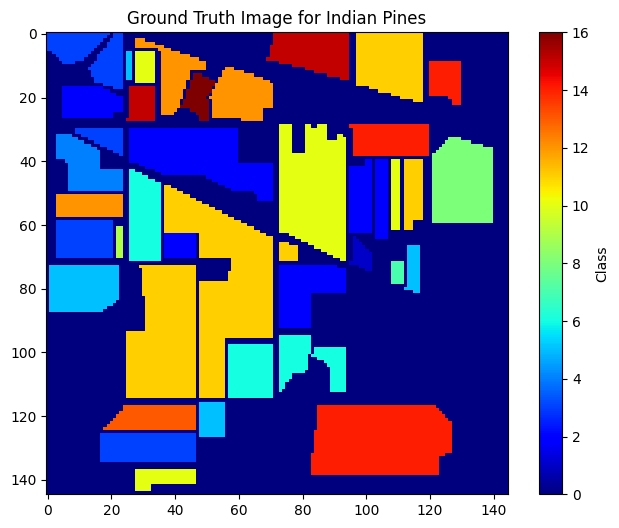

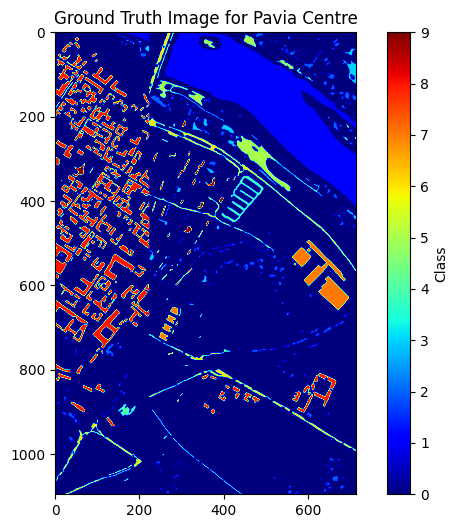

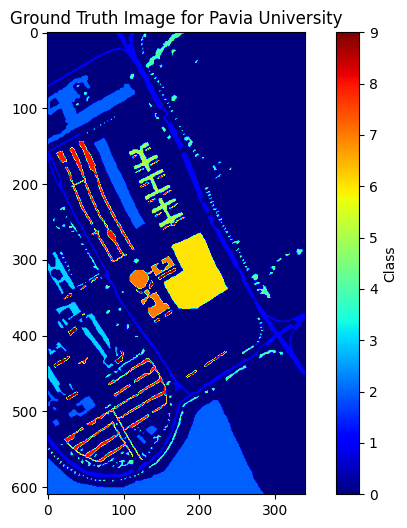

In [ ]:
for dataset, ground_truth, dataset_name in datasets:
    visualize_ground_truth(dataset_name, ground_truth)

**Second approach :** The ground truth data is processed by iterating over each pixel, and based on its class label, a corresponding RGB color value is assigned. This color mapping is manually defined for each class label.

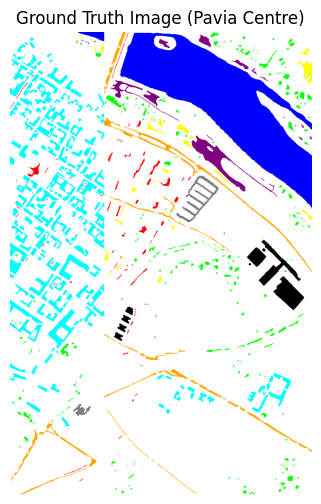

In [ ]:
def plot_ground_truth_pavia_centre(ground_truth_data):
    class_colors = {
        0: [255, 255, 255],     # Unclassified (White)
        1: [0, 0, 255],         # Water (Blue)
        2: [0, 255, 0],         # Trees (Green)
        3: [255, 255, 0],       # Asphalt (Yellow)
        4: [128, 128, 128],     # Self-Blocking Bricks (Gray)
        5: [128, 0, 128],       # Bitumen (Purple)
        6: [255, 165, 0],       # Tiles (Orange)
        7: [0, 0, 0],           # Shadows (Black)
        8: [0, 255, 255],       # Meadows (Cyan)
        9: [255, 0, 0]          # Bare Soil (Red)
    }

    y = np.zeros((ground_truth_data.size, 3))
    for i, class_label in enumerate(ground_truth_data.ravel()):
        y[i] = np.array(class_colors.get(class_label, [255, 255, 255])) / 255.

    ground_truth_image = np.reshape(y, (ground_truth_data.shape[0], ground_truth_data.shape[1], 3))
    plt.figure(figsize=(8, 6))
    plt.imshow(ground_truth_image)
    plt.title('Ground Truth Image (Pavia Centre)')
    plt.axis('off')
    plt.show()

plot_ground_truth_pavia_centre(pavia_centre_gt)


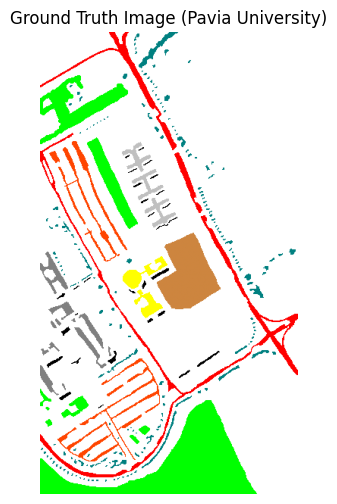

In [ ]:
def plot_ground_truth_pavia_university(ground_truth_data):
    class_colors = {
        0: [255, 255, 255],             # Unclassified (White)
        1: [255, 0, 0],                 # Asphalt (Red)
        2: [0, 255, 0],                 # Meadows (Green)
        3: [128, 128, 128],             # Gravel (Gray)
        4: [0, 128, 128],               # Trees (Teal)
        5: [192, 192, 192],             # Painted metal sheets (Silver)
        6: [205, 133, 63],              # Bare Soil (Brown)
        7: [255, 255, 0],               # Bitumen (Yellow)
        8: [255, 69, 0],                # Self-Blocking Bricks (Orange Red)
        9: [0, 0, 0]                    # Shadows (Black)
    }

    y = np.zeros((ground_truth_data.size, 3))
    for i, class_label in enumerate(ground_truth_data.ravel()):
        y[i] = np.array(class_colors.get(class_label, [255, 255, 255])) / 255.

    ground_truth_image = np.reshape(y, (ground_truth_data.shape[0], ground_truth_data.shape[1], 3))
    plt.figure(figsize=(8, 6))
    plt.imshow(ground_truth_image)
    plt.title('Ground Truth Image (Pavia University)')
    plt.axis('off')
    plt.show()

plot_ground_truth_pavia_university(pavia_university_gt)


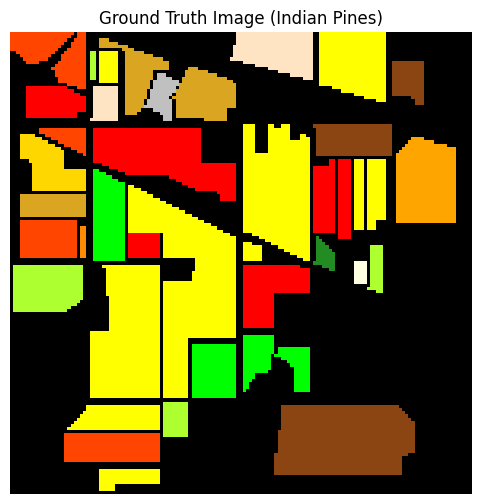

In [ ]:
def plot_ground_truth_indian_pines(ground_truth_data):
    class_colors = {
        0: [0, 0, 0],           # Background
        1: [34, 139, 34],       # Alfalfa (Green)
        2: [255, 0, 0],         # Corn-notill (Red)
        3: [255, 69, 0],        # Corn-mintill (Orange Red)
        4: [255, 215, 0],       # Corn (Gold)
        5: [173, 255, 47],      # Grass-pasture (Green Yellow)
        6: [0, 255, 0],         # Grass-trees (Lime)
        7: [255, 255, 224],     # Grass-pasture-mowed (Light Yellow)
        8: [255, 165, 0],       # Hay-windrowed (Orange)
        9: [255, 140, 0],       # Oats (Dark Orange)
        10: [255, 255, 0],      # Soybean-notill (Yellow)
        11: [255, 255, 0],      # Soybean-mintill (Yellow)
        12: [218, 165, 32],     # Soybean-clean (Goldenrod)
        13: [255, 255, 0],      # Wheat (Yellow)
        14: [139, 69, 19],      # Woods (Saddle Brown)
        15: [255, 228, 196],    # Buildings-Grass-Trees-Drives (Bisque)
        16: [192, 192, 192]     # Stone-Steel-Towers (Silver)
    }

    y = np.zeros((ground_truth_data.size, 3))
    for i, class_label in enumerate(ground_truth_data.ravel()):
        y[i] = np.array(class_colors.get(class_label, [255, 255, 255])) / 255.

    ground_truth_image = np.reshape(y, (ground_truth_data.shape[0], ground_truth_data.shape[1], 3))
    plt.figure(figsize=(8, 6))
    plt.imshow(ground_truth_image)
    plt.title('Ground Truth Image (Indian Pines)')
    plt.axis('off')
    plt.show()

plot_ground_truth_indian_pines(indian_pines_gt)


### False Color Image

In a false-color image specific bands of the hyperspectral data are mapped to the RGB channels to create a visually interpretable image. However, in a false-color image, the bands used for mapping may not correspond directly to the traditional red, green, and blue channels. Instead, different bands, often chosen for their diagnostic properties or spectral characteristics, are used to create the false-color representation. False-color images are commonly used in remote sensing applications to highlight specific features such as vegetation health, land cover, or mineral composition

In [ ]:
def create_false_color_image(dataset, bands):
    false_color_image = np.stack((dataset[:,:,bands[0]], dataset[:,:,bands[1]], dataset[:,:,bands[2]]), axis=2)
    false_color_image = (false_color_image - np.min(false_color_image)) / (np.max(false_color_image) - np.min(false_color_image))
    return false_color_image


**First approach :** The false-color image is created by selecting specific bands from the hyperspectral data and stacking them together to form an RGB image. The pixel values are normalized within each band before combining them into the RGB image.

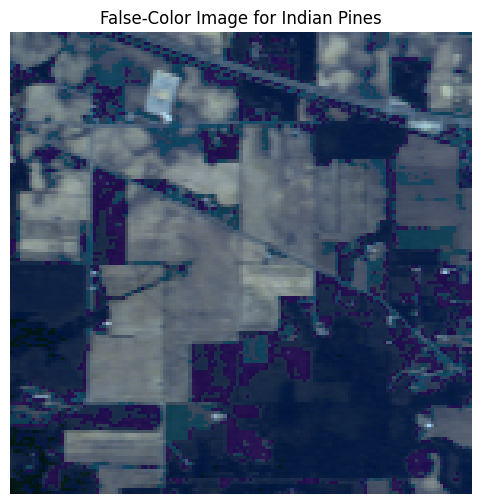

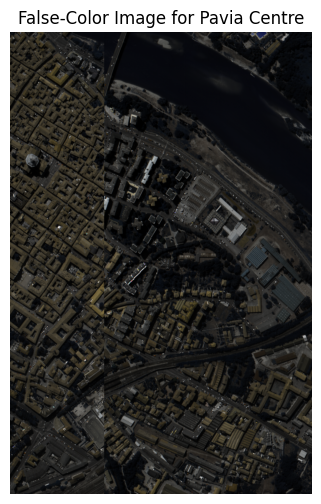

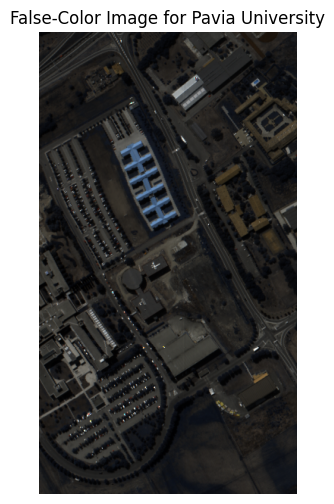

In [ ]:
for dataset, ground_truth, dataset_name in datasets:
    if dataset_name == "Indian Pines":
        false_color_bands = [30, 20, 10]
    elif dataset_name == "Pavia Centre":
        false_color_bands = [55, 45, 35]
    elif dataset_name == "Pavia University":
        false_color_bands = [50, 40, 30]
    else:
        print(f"Unknown dataset: {dataset_name}")
        continue

    false_color_image = create_false_color_image(dataset, false_color_bands)
    plt.figure(figsize=(8, 6))
    plt.imshow(false_color_image)
    plt.title(f'False-Color Image for {dataset_name}')
    plt.axis('off')
    plt.show()


In [ ]:
# Function to process hyperspectral image data and plot the RGB image
def plot_hyperspectral_rgb(hyperspectral_data):
    data = hyperspectral_data / 8000.
    blue = data[:, :, 10]  # blue band
    green = data[:, :, 24]  # green band
    red = data[:, :, 44]  # red band
    rgb_hsi = np.zeros((data.shape[0], data.shape[1], 3))
    rgb_hsi[:, :, 0] = red
    rgb_hsi[:, :, 1] = green
    rgb_hsi[:, :, 2] = blue
    # Normalize pixel values to [0, 1] range
    rgb_hsi = np.clip(rgb_hsi, 0, 1)
    plt.figure(figsize=(8, 6))
    plt.imshow(rgb_hsi)
    plt.title('Hyperspectral RGB Image')
    plt.axis('off')
    plt.show()

**Second approach :** The hyperspectral RGB image is generated by selecting specific bands (red, green, blue) from the hyperspectral data and combining them into an RGB image. The pixel values are then normalized to the [0, 1] range before plotting

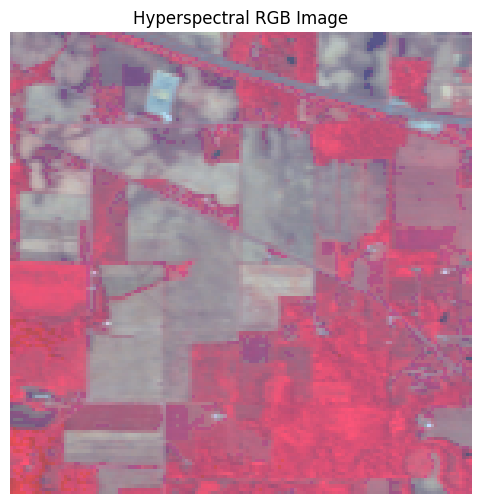

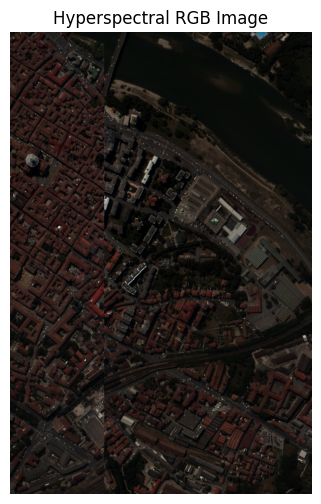

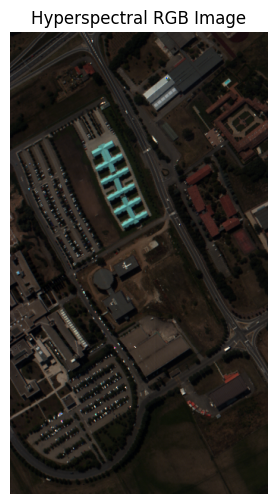

In [ ]:
# Process and plot the hyperspectral RGB image for each dataset
for hyperspectral_data in [indian_pines_data, pavia_centre_data, pavia_university_data]:
    plot_hyperspectral_rgb(hyperspectral_data)

# Normalization

In [ ]:
def normalize_data(raw_data):
    max_value = np.max(raw_data)
    min_value = np.min(raw_data)
    normalized_data = (raw_data - min_value) / (max_value - min_value)
    return normalized_data


In [ ]:
indian_pines_normalized = normalize_data(indian_pines_data)

pavia_centre_normalized = normalize_data(pavia_centre_data)

pavia_university_normalized = normalize_data(pavia_university_data)

print(indian_pines_normalized.shape)
print(pavia_centre_normalized.shape)
print(pavia_university_normalized.shape)



(145, 145, 200)
(1096, 715, 102)
(610, 340, 103)


each pixel in the image is represented by a 3D array where the first two dimensions represent the spatial dimensions (rows and columns) and the third dimension represents spectral bands or features.

### Visualizing the change brought about by normalization

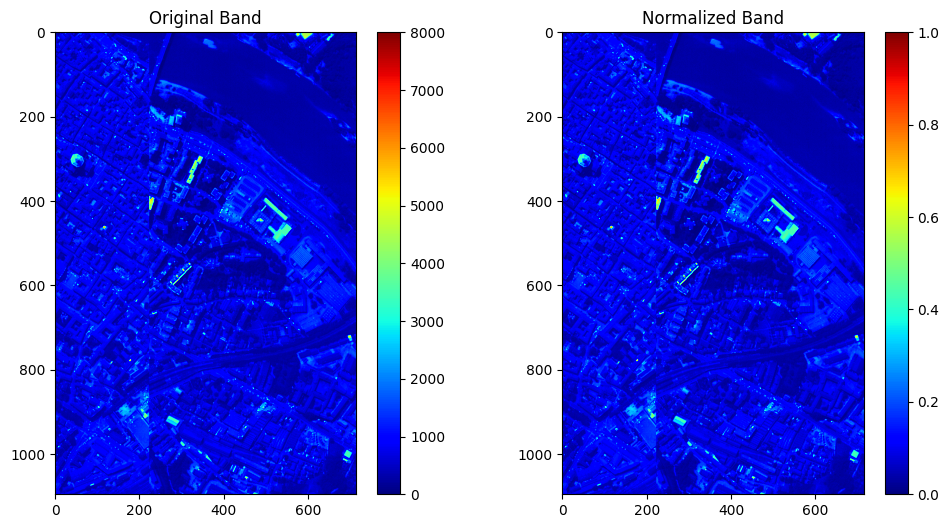

In [ ]:
import matplotlib.pyplot as plt

band_idx = 10

original_band = pavia_centre_data[:, :, band_idx]

normalized_band = pavia_centre_normalized[:, :, band_idx]

plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.imshow(original_band, cmap='jet')
plt.title('Original Band')
plt.colorbar()

# Normalized data
plt.subplot(1, 2, 2)
plt.imshow(normalized_band, cmap='jet')
plt.title('Normalized Band')
plt.colorbar()

plt.show()


# Redundancy analysis with PCA

In [ ]:
# Reshape or flatten the datasets
indian_pines_flattened = indian_pines_normalized.reshape(-1, indian_pines_normalized.shape[-1])
pavia_centre_flattened = pavia_centre_normalized.reshape(-1, pavia_centre_normalized.shape[-1])
pavia_university_flattened = pavia_university_normalized.reshape(-1, pavia_university_normalized.shape[-1])


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

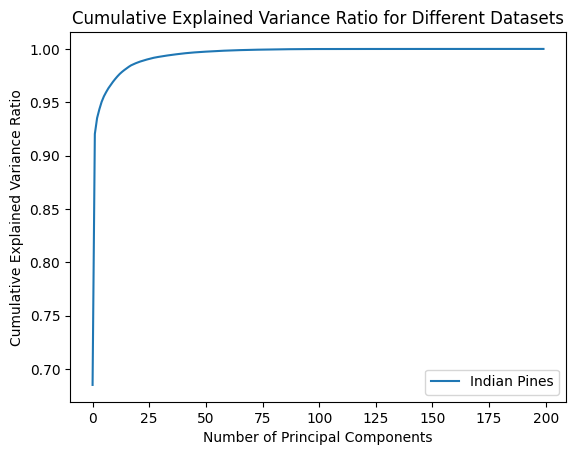

In [ ]:
pcX_indian_pines = pca.fit_transform(indian_pines_flattened)
ev_indian_pines = pca.explained_variance_ratio_
cumulativeVar_indian_pines = np.cumsum(ev_indian_pines)
plt.plot(cumulativeVar_indian_pines, label='Indian Pines')


plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Different Datasets')
plt.legend()
plt.show()

The curve shows that practically all the variance in the IP dataset is explained with the first 40 principal components. The rest of them are likely to contain mostly noise.

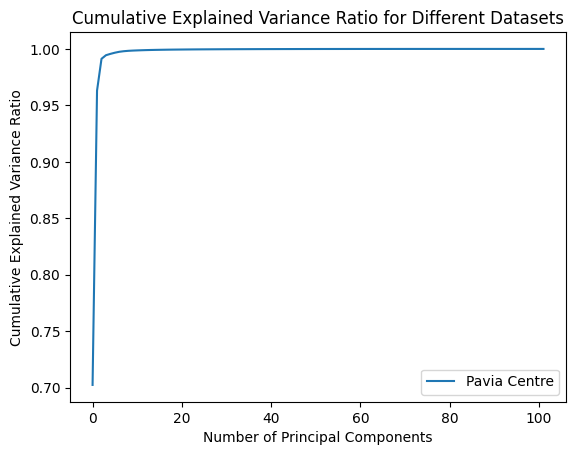

In [ ]:
# Pavia Centre
pcX_pavia_centre = pca.fit_transform(pavia_centre_flattened)
ev_pavia_centre = pca.explained_variance_ratio_
cumulativeVar_pavia_centre = np.cumsum(ev_pavia_centre)
plt.plot(cumulativeVar_pavia_centre, label='Pavia Centre')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Different Datasets')
plt.legend()
plt.show()

The curve shows that practically all the variance in the IP dataset is explained with the first 5 principal components. The rest of them are likely to contain mostly noise.

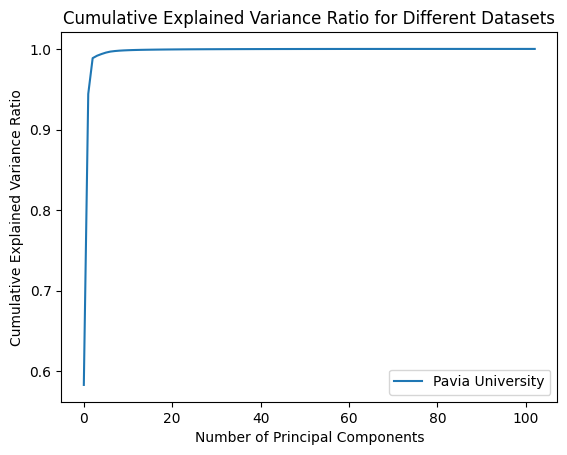

In [ ]:
# Pavia University
pcX_pavia_university = pca.fit_transform(pavia_university_flattened)
ev_pavia_university = pca.explained_variance_ratio_
cumulativeVar_pavia_university = np.cumsum(ev_pavia_university)
plt.plot(cumulativeVar_pavia_university, label='Pavia University')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio for Different Datasets')
plt.legend()
plt.show()


The curve shows that practically all the variance in the IP dataset is explained with the first 5 principal components. The rest of them are likely to contain mostly noise.

# Dimensionality reduction and HSI pseudocolor visualization

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def dimension_PCA(data, input_dimension):
    # Reshape the data into a 2D array (samples x features)
    num_samples, num_features, num_bands = data.shape
    flattened_data = data.reshape(num_samples * num_features, num_bands)

    # Apply PCA to the flattened data
    pca = PCA(n_components=input_dimension)
    pca.fit(flattened_data)

    # Transform the data back to the original shape
    transformed_data = pca.transform(flattened_data)
    whole_pca = transformed_data.reshape(num_samples, num_features, input_dimension)

    return whole_pca




In [ ]:

indian_pines_pca = dimension_PCA(indian_pines_normalized, 40)

pavia_centre_pca = dimension_PCA(pavia_centre_normalized,5)

pavia_university_pca = dimension_PCA(pavia_university_normalized, 5)

print(indian_pines_pca.shape)
print(pavia_centre_pca.shape)
print(pavia_university_pca.shape)

(145, 145, 40)
(1096, 715, 5)
(610, 340, 5)


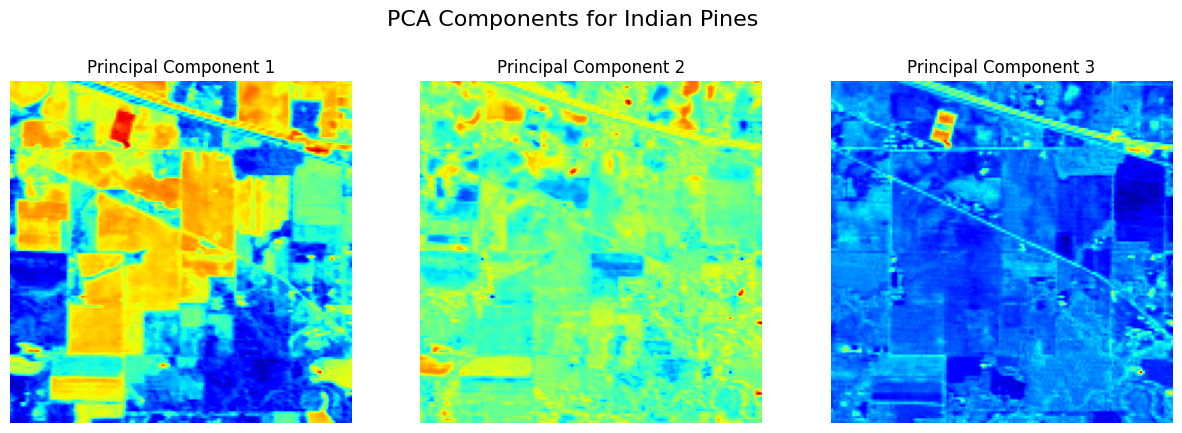

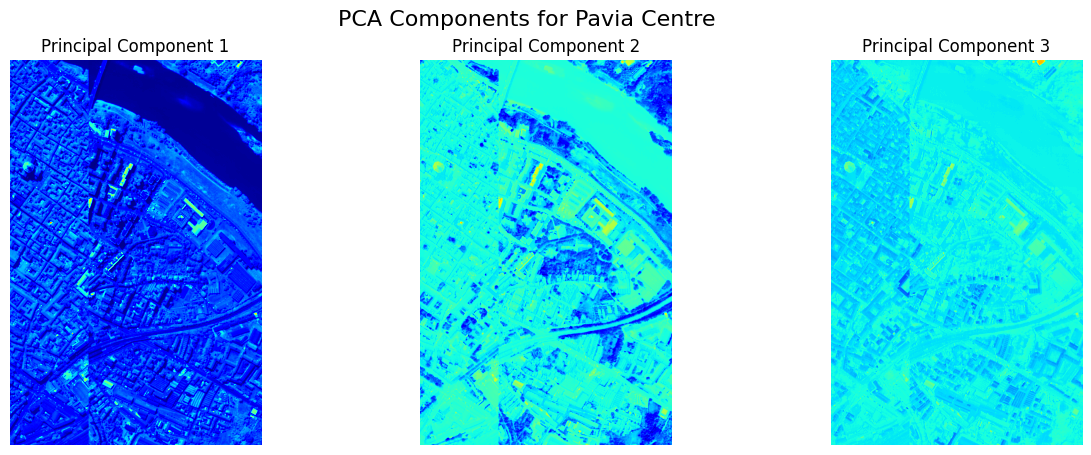

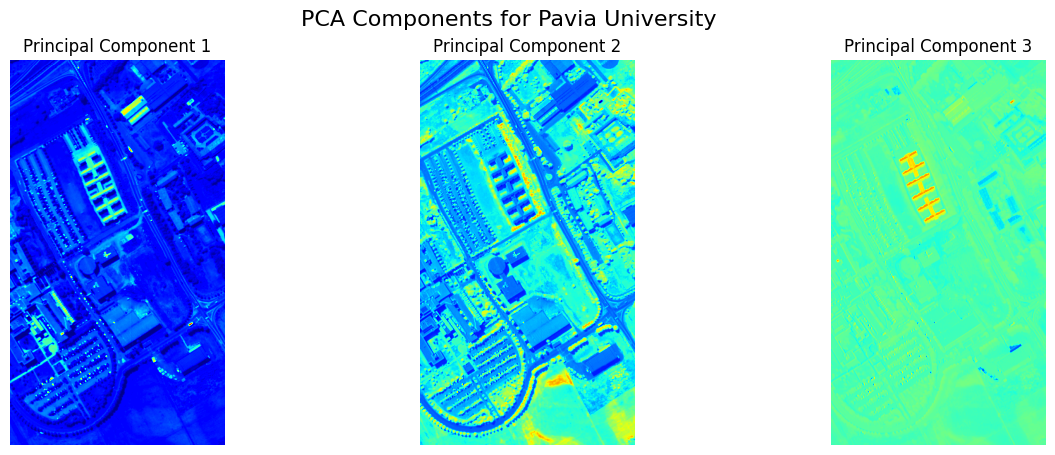

In [ ]:
import matplotlib.pyplot as plt

def plot_pca_components(pca_data, dataset_name, num_components=3):
    fig, axes = plt.subplots(1, num_components, figsize=(15, 5))
    for i in range(num_components):
        axes[i].imshow(pca_data[:, :, i], cmap='jet')
        axes[i].set_title(f'Principal Component {i+1}')
        axes[i].axis('off')
    fig.suptitle(f'PCA Components for {dataset_name}', fontsize=16)
    plt.show()

plot_pca_components(indian_pines_pca, 'Indian Pines')

plot_pca_components(pavia_centre_pca, 'Pavia Centre')

plot_pca_components(pavia_university_pca, 'Pavia University')


### PseudoColor Image

In a pseudocolor image, specific bands of the hyperspectral data are mapped to the RGB channels to create a visually interpretable image. Typically, this mapping is done by selecting three bands (e.g., red, green, and blue) from the hyperspectral data and assigning them to the corresponding channels in an RGB image. Pseudocolor visualization helps enhance certain features or characteristics of the data by representing them in different colors.

In [ ]:
def create_pseudocolor_image(pca_data, bands):
    # Use selected principal components for pseudocolor visualization
    pseudocolor_image = np.stack((pca_data[:,:,bands[0]], pca_data[:,:,bands[1]], pca_data[:,:,bands[2]]), axis=2)

    # Normalize the pseudocolor image data
    pseudocolor_image = np.clip(pseudocolor_image, 0, 1)  # Ensure values are within [0, 1]

    return pseudocolor_image

# Parameters
pseudocolor_bands = [0, 1, 2]  # Bands for pseudocolor visualization

# Create pseudocolor images for each dataset
indian_pines_pseudocolor = create_pseudocolor_image(indian_pines_pca, pseudocolor_bands)
pavia_centre_pseudocolor = create_pseudocolor_image(pavia_centre_pca, pseudocolor_bands)
pavia_university_pseudocolor = create_pseudocolor_image(pavia_university_pca, pseudocolor_bands)




 In the context of PCA, the bands refer to the principal components rather than the original spectral bands. When performing PCA, the principal components are ordered by their importance or variance explained.

In the snippet provided, pseudocolor_bands = [0, 1, 2] selects the first three principal components for pseudocolor visualization. These components are typically chosen to represent the most significant variation in the data.


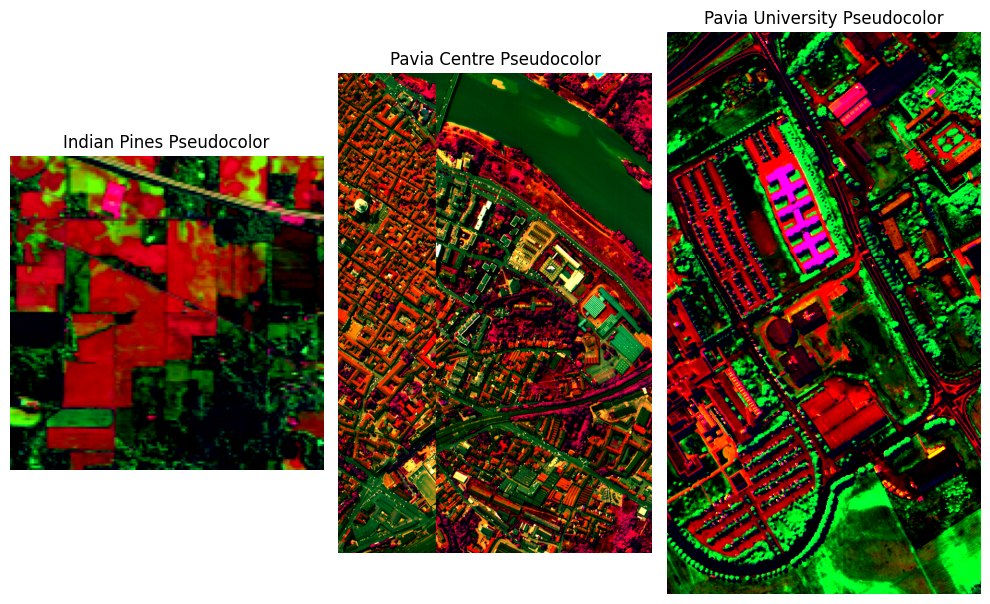

In [ ]:
# Plot pseudocolor images for each dataset
plt.figure(figsize=(10, 8))

plt.subplot(131)
plt.imshow(indian_pines_pseudocolor)
plt.title('Indian Pines Pseudocolor')
plt.axis('off')

plt.subplot(132)
plt.imshow(pavia_centre_pseudocolor)
plt.title('Pavia Centre Pseudocolor')
plt.axis('off')

plt.subplot(133)
plt.imshow(pavia_university_pseudocolor)
plt.title('Pavia University Pseudocolor')
plt.axis('off')

plt.tight_layout()
plt.show()

# Segmentation


Segmentation in hyperspectral image analysis refers to the process of **dividing** an image into **meaningful and homogeneous regions** or segments based on certain characteristics, such as spectral similarity. This is important because hyperspectral images contain a wealth of spectral information across numerous narrow spectral bands, allowing for detailed analysis of the materials and objects present in the scene.

To segmentate the datasets, we can use **clustering algorithms** such as **K-means** or **spectral clustering**, which group pixels in the hyperspectral image based on their spectral similarity.Before applying clustering, we need to decide on the **number of clusters/classes **we want to identify, which corresponds to the number of segments or regions in the image.

For the Pavia Centre and Pavia University datasets, the groundtruth classes provide insight into the types of materials or land cover present in the scenes. We can use this information to determine the appropriate number of clusters for segmentation. For example, both datasets have **nine** groundtruth classes, so we might consider using nine clusters for segmentation.

For the Indian Pines dataset, there are **sixteen** groundtruth classes, which suggests using sixteen clusters for segmentation.


### Using k-means

In [ ]:
from sklearn.cluster import KMeans, SpectralClustering
import numpy as np
import matplotlib.pyplot as plt

In [ ]:


def kmeans_segmentation(data, num_clusters):
    # Flatten the data for clustering
    num_samples, num_pixels, num_bands = data.shape
    flattened_data = data.reshape(num_samples * num_pixels, num_bands)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(flattened_data)

    # Reshape the labels back to the original shape
    segmented_image = labels.reshape(num_samples, num_pixels)

    return segmented_image

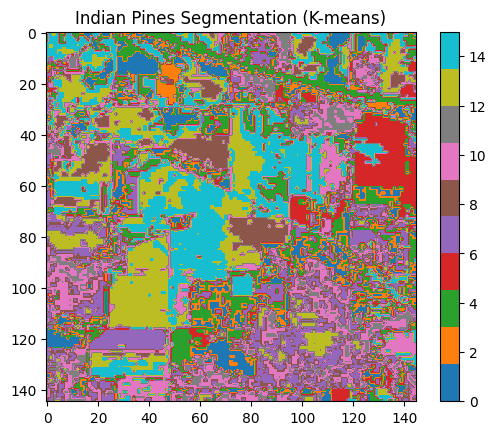

In [ ]:
indian_pines_segmented_kmeans = kmeans_segmentation(indian_pines_normalized, 16)

plt.imshow(indian_pines_segmented_kmeans, cmap='tab10')
plt.title('Indian Pines Segmentation (K-means)')
plt.colorbar()
plt.show()


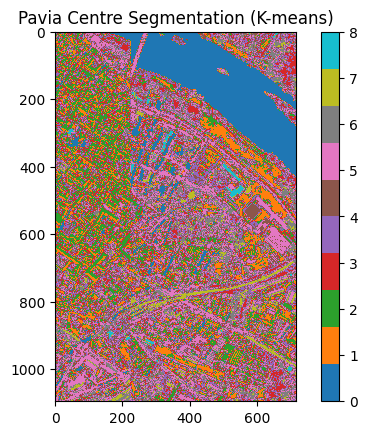

In [ ]:
pavia_centre_segmented_kmeans = kmeans_segmentation(pavia_centre_normalized, 9)

plt.imshow(pavia_centre_segmented_kmeans, cmap='tab10')
plt.title('Pavia Centre Segmentation (K-means)')
plt.colorbar()
plt.show()


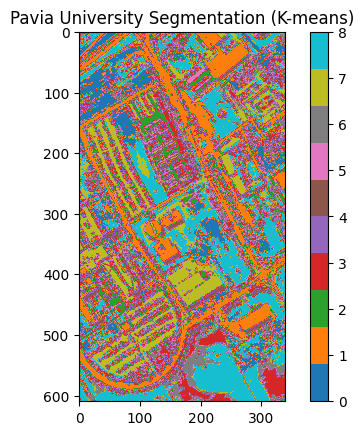

In [ ]:
pavia_university_segmented_kmeans = kmeans_segmentation(pavia_university_normalized, 9)

plt.imshow(pavia_university_segmented_kmeans, cmap='tab10')
plt.title('Pavia University Segmentation (K-means)')
plt.colorbar()
plt.show()


### Using spectral_clustering

In [ ]:
def spectral_clustering(data, num_clusters):
    # Flatten the data for clustering
    num_samples, num_pixels, num_bands = data.shape
    flattened_data = data.reshape(num_samples * num_pixels, num_bands)

    # Apply spectral clustering
    spectral = SpectralClustering(n_clusters=num_clusters, random_state=42, affinity='nearest_neighbors')
    labels = spectral.fit_predict(flattened_data)

    # Reshape the labels back to the original shape
    segmented_image = labels.reshape(num_samples, num_pixels)

    return segmented_image


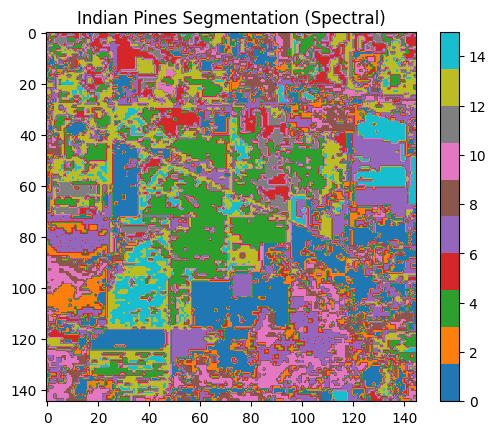

In [ ]:
indian_pines_segmented_spectral = spectral_clustering(indian_pines_normalized, 16)

plt.imshow(indian_pines_segmented_spectral, cmap='tab10')
plt.title('Indian Pines Segmentation (Spectral)')
plt.colorbar()
plt.show()


In [ ]:
pavia_centre_segmented_spectral = spectral_clustering(pavia_centre_normalized, 9)

plt.imshow(pavia_centre_segmented_spectral, cmap='tab10')
plt.title('Pavia Centre Segmentation (Spectral)')
plt.colorbar()
plt.show()


In [ ]:
pavia_university_segmented_spectral = spectral_clustering(pavia_university_normalized, 9)

plt.imshow(pavia_university_segmented_spectral, cmap='tab10')
plt.title('Pavia University Segmentation (Spectral)')
plt.colorbar()
plt.show()


# Classification

## Classification Model Training with 1D CNN


In [ ]:
labeled_data = pavia_centre_data[pavia_centre_gt != 0]
labeled_labels = pavia_centre_gt[pavia_centre_gt != 0]

unlabeled_data = pavia_centre_data[pavia_centre_gt == 0]

print(labeled_data.shape)
print(labeled_labels)
print(unlabeled_data.shape)


(148152, 102)
[1 1 1 ... 2 2 2]
(635488, 102)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalMaxPooling1D

train_data, val_data, train_labels, val_labels = train_test_split(labeled_data, labeled_labels, test_size=0.2, random_state=42)

# Modify labels to make them 0-indexed
train_labels -= 1
val_labels -= 1

# Define the 1D CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(102, 1)),#to be explained
    Conv1D(64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(9, activation='softmax')  # Assuming 9 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape the data to match the input shape of the model
train_data = train_data.reshape(-1, 102, 1)
val_data = val_data.reshape(-1, 102, 1)

# Train the model
model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_data=(val_data, val_labels))


Epoch 1/10
3704/3704 [==============================] - 51s 13ms/step - loss: 1.0784 - accuracy: 0.8020 - val_loss: 0.3710 - val_accuracy: 0.8692
Epoch 2/10
3704/3704 [==============================] - 48s 13ms/step - loss: 0.3610 - accuracy: 0.8693 - val_loss: 0.3529 - val_accuracy: 0.8840
Epoch 3/10
3704/3704 [==============================] - 44s 12ms/step - loss: 0.2862 - accuracy: 0.8940 - val_loss: 0.3009 - val_accuracy: 0.8880
Epoch 4/10
3704/3704 [==============================] - 45s 12ms/step - loss: 0.2465 - accuracy: 0.9090 - val_loss: 0.2355 - val_accuracy: 0.9145
Epoch 5/10
3704/3704 [==============================] - 45s 12ms/step - loss: 0.2170 - accuracy: 0.9204 - val_loss: 0.2405 - val_accuracy: 0.9050
Epoch 6/10
3704/3704 [==============================] - 44s 12ms/step - loss: 0.2021 - accuracy: 0.9258 - val_loss: 0.1741 - val_accuracy: 0.9425
Epoch 7/10
3704/3704 [==============================] - 47s 13ms/step - loss: 0.1914 - accuracy: 0.9303 - val_loss: 0.1665 -

In [ ]:

unlabeled_data_normalized = normalize_data(unlabeled_data)

subset_size = 20

subset_unlabeled_data = unlabeled_data_normalized[:subset_size]

subset_predictions = model.predict(subset_unlabeled_data)

for i, prediction in enumerate(subset_predictions):
    print(f"Sample {i + 1} prediction probabilities:")
    for j, prob in enumerate(prediction):
        print(f"Class {j + 1}: {prob:.10f}")
    print()

1/1 [==============================] - 0s 167ms/step
Sample 1 prediction probabilities:
Class 1: 0.0000000171
Class 2: 0.0000000000
Class 3: 0.0000000000
Class 4: 0.0000000000
Class 5: 0.0000000000
Class 6: 0.0000000000
Class 7: 0.0000000000
Class 8: 0.0000000000
Class 9: 0.9999999404

Sample 2 prediction probabilities:
Class 1: 0.0000000176
Class 2: 0.0000000000
Class 3: 0.0000000000
Class 4: 0.0000000000
Class 5: 0.0000000000
Class 6: 0.0000000000
Class 7: 0.0000000000
Class 8: 0.0000000000
Class 9: 0.9999999404

Sample 3 prediction probabilities:
Class 1: 0.0000000203
Class 2: 0.0000000000
Class 3: 0.0000000000
Class 4: 0.0000000000
Class 5: 0.0000000000
Class 6: 0.0000000000
Class 7: 0.0000000000
Class 8: 0.0000000000
Class 9: 0.9999999404

Sample 4 prediction probabilities:
Class 1: 0.0000000186
Class 2: 0.0000000000
Class 3: 0.0000000000
Class 4: 0.0000000000
Class 5: 0.0000000000
Class 6: 0.0000000000
Class 7: 0.0000000000
Class 8: 0.0000000000
Class 9: 0.9999999404

Sample 5 pr

Each row contains the predicted probabilities for a single sample.
Each column represents a different class.
The values in each cell represent the probability of the corresponding sample belonging to the corresponding class.

# Training and test data

In [ ]:
import numpy as np
import math

def data_split(gt, train_fraction=0.7, rem_classes=None,
               split_method='same_hist'):
    """
    Outputs list of row and column indices for training and test sets.

    Arguments
    ---------
    gt : numpy array
        A 2-D numpy array, containing integer values representing class ids.

    train_fraction : float
        The ratio of training size to the entire dataset.

    rem_classes : None or array_like
        list of class ids (integers) not to be included in analysis, e.g., class
        ids that do not have any ground truth values.

    split_method : 'same_hist' or a dictionary
        The dictionaries keys represent class label and values represent number
        of elemnt to be used for training in each class.

    Returns
    -------
    out : 2-D tuple
        Contains lists of rows and column indices for training
        and test sets: (train_rows, train_cols), (test_rows, test_cols)
    """

    if rem_classes is None:
        rem_classes = []

    catgs, counts = np.unique(gt, return_counts=True)
    mask = np.isin(catgs, rem_classes, invert=True)
    catgs, counts = catgs[mask], counts[mask]
    # Counts the number of values after removing rem_classes:
    num_pixels = sum(np.isin(gt,rem_classes, invert=True).ravel())
    catg_ratios = counts/np.sum(counts)
    num_sample_catgs = np.array([math.floor(elm) for elm in
                                 (catg_ratios * num_pixels)], dtype='int32')
    all_catg_indices = [np.where(gt==catg) for catg in catgs]
    # A 2-D tuple with first element representing number of samples per catg
    # and the second element a 2-D tuple containing row and column indices in
    # the gt array.
    catg_with_indices = zip(num_sample_catgs, all_catg_indices, catgs)
    train_rows, train_cols, test_rows, test_cols = [], [], [], []

    #####if else goes here....
    for elm in catg_with_indices:
        all_indices_per_catg = np.arange(elm[0], dtype='int32')
        if split_method == 'same_hist':
            rand_train_indices = np.random.choice(all_indices_per_catg,
                                                  size=int(math.floor(elm[0]*train_fraction)),
                                                  replace=False)
            rand_test_indices = np.setdiff1d(ar1=all_indices_per_catg,
                                             ar2=rand_train_indices, assume_unique=True)
        elif isinstance(split_method, dict):
            rand_train_indices = np.random.choice(all_indices_per_catg,
                                                  size=split_method.get(elm[2]),
                                                  replace=False)
            rand_test_indices = np.setdiff1d(ar1=all_indices_per_catg,
                                             ar2=rand_train_indices, assume_unique=True)
        else:
            raise ValueError('Please select a valid option')


        train_rows.append(elm[1][0][rand_train_indices])
        train_cols.append(elm[1][1][rand_train_indices])
        test_rows.append(elm[1][0][rand_test_indices])
        test_cols.append(elm[1][1][rand_test_indices])

    # Function for flattening lists of sequences...
    def list_combiner(x, init_list=None):
        if init_list is None:
            init_list=[]
        for elm in x:
            for sub_elm in elm:
                init_list.append(sub_elm)
        return init_list

    # Combining indices for different categories...
    train_rows, train_cols = [list_combiner(elm) for elm in (train_rows, train_cols)]
    test_rows, test_cols = [list_combiner(elm) for elm in (test_rows, test_cols)]

    return (train_rows, train_cols), (test_rows, test_cols)



In [ ]:

train_fraction = 0.75
rem_classes = [0]
(train_rows, train_cols), (test_rows, test_cols) = data_split(indian_pines_gt,
                                                              train_fraction=train_fraction,
                                                              rem_classes=rem_classes)

print('Number of training samples = {}.\nNumber of test samples = {}.'.format(len(train_rows), len(test_rows)))

Number of training samples = 7679.
Number of test samples = 2569.


In [ ]:
def val_split(rows, cols, gt, val_fraction=0.1, rem_classes=None,
              split_method='same_hist'):
    if rem_classes is None:
        rem_classes=[-1]

    gt_no_test = np.zeros(shape=gt.shape, dtype='int').reshape(gt.shape)-1
    for elm in zip(rows,cols):
        gt_no_test[rows, cols] = gt[rows, cols]

    (train_rows, train_cols), (val_rows, val_cols) = data_split(
    gt_no_test,
    1-val_fraction,
    rem_classes,
    split_method)

    return (train_rows, train_cols), (val_rows, val_cols)




In [ ]:
val_fraction = 0.05
(train_rows_sub, train_cols_sub), (val_rows, val_cols) = val_split(
        train_rows, train_cols, indian_pines_gt, val_fraction=val_fraction)


# Dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Dimensionality reduction using Principal Component analysis (PCA)
def reduce_dim(img_data, n_components=0.95):
    """
    Reduces spectral dimension of image data using PCA.

    Arguments
    ---------
    img_data : 3-D numpy.ndarray
        Contains image data with shape: (height, width, band).

    n_components : float between 0 and 1 or and int.
        If float, represents the minimum fraction of variance, explained by
        n_components. If integer, represents the number of components.

    Returns
    -------
    img_data_transformed : 3-D numpy.ndarray
        Contains transformed data with shape (height, width, n_components).


    """

    # Unravelling each band's data
    img_shape = img_data.shape
    img_unravel = np.zeros(shape=(img_shape[0]*img_shape[1],img_shape[2]))
    for i in range(img_shape[2]):
        img_unravel[:,i] = np.ravel(img_data[:,:,i])


    pca = PCA(n_components=n_components)
    unravel_transformed = pca.fit_transform(img_unravel)

    # Reshaping transformed data:
    n_col = unravel_transformed.shape[1]
    img_data_transformed = np.zeros(shape=(img_shape[0], img_shape[1], n_col))
    for i in np.arange(n_col):
        img_data_transformed[:,:,i] = np.reshape(
                unravel_transformed[:,i], newshape=(img_shape[0], img_shape[1]))


    return img_data_transformed

In [ ]:
data_set = reduce_dim(img_data=indian_pines_data, n_components=0.999)
print(data_set.shape)

(145, 145, 69)


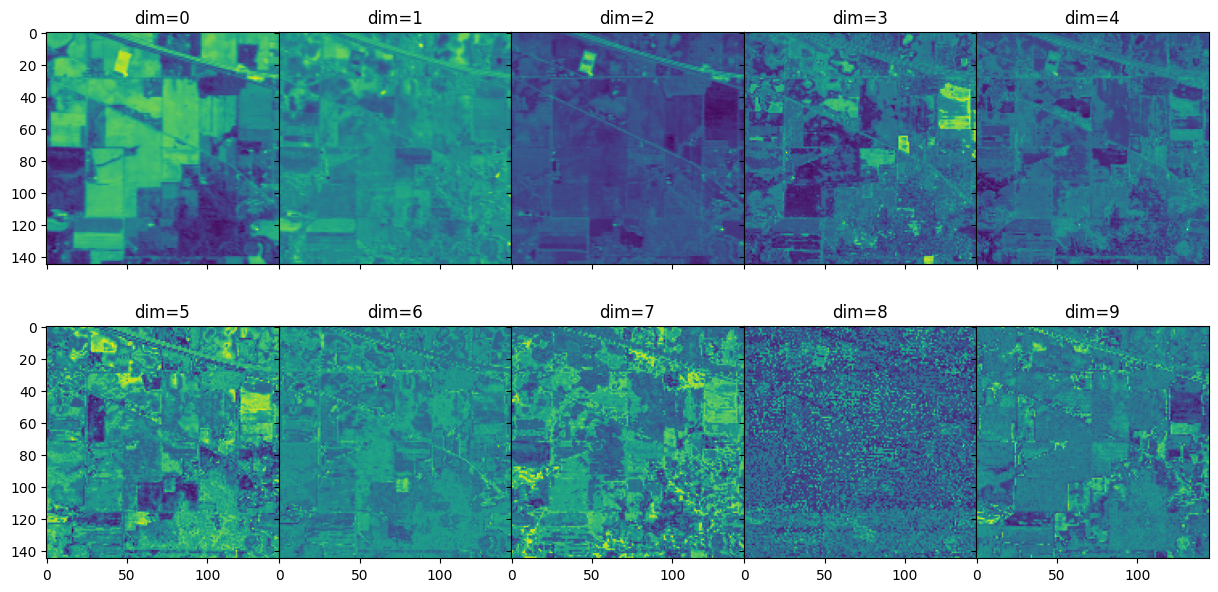

In [ ]:
fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(15, 7))
for numb, axe in enumerate(axes.flat):
    axe.imshow(data_set[:,:,numb])
    axe.set_title('dim=' + str(numb))

fig.subplots_adjust(wspace=0, hspace=.2)
plt.show()


# Rescaling data

In [ ]:
def rescale_data(data_set, method='standard'):
    """
    Rescales image dataset using different methods.

    Arguments
    ---------
    data_set : 3-D numpy.ndarray
        Contains image data with format: (height, width, channels).

    method : str
        Represents rescaling method. Can take one of: 'standard', 'zero_mean',
        or 'min_max_norm', 'mean_norm'.

    Returns: rescaled_data
    """
    if (not isinstance(data_set, np.ndarray)) or (len(data_set.shape) != 3):
        raise ValueError('data_set must be a 3-D numpy array!')

    rescaled_data = data_set.copy()
    height, width, num_channels = data_set.shape

    if method == 'standard':
        for i in range(num_channels):
            channel = data_set[:, :, i]
            mean = np.mean(channel)
            std = np.std(channel)
            rescaled_data[:, :, i] = (channel - mean) / std
    elif method == 'zero_mean':
        for i in range(num_channels):
            channel = data_set[:, :, i]
            mean = np.mean(channel)
            rescaled_data[:, :, i] = channel - mean
    elif method == 'min_max_norm':
        for i in range(num_channels):
            channel = data_set[:, :, i]
            min_val = np.min(channel)
            max_val = np.max(channel)
            rescaled_data[:, :, i] = (channel - min_val) / (max_val - min_val)
    elif method == 'mean_norm':
        for i in range(num_channels):
            channel = data_set[:, :, i]
            mean = np.mean(channel)
            min_val = np.min(channel)
            max_val = np.max(channel)
            rescaled_data[:, :, i] = (channel - mean) / (max_val - min_val)
    else:
        raise ValueError('{} is not a valid method.'.format(method))

    return rescaled_data


In [ ]:
data_set = rescale_data(data_set)
print(data_set.shape)

(145, 145, 69)


# Creating input and target tensors

In [ ]:
import numpy as np

def label_2_one_hot(label_list):
    """
    Creates a dictionary containing class labels and their one-hot vector.

    Arguments
    ---------
    label_list : list of integers
        Contains class labels.

    Returns
    -------
    one_hot_dict : dictionary
        A dictionary with class labels of type int as keys and their one-hot
        vector representation as values.

    """
    catgs = np.unique(label_list)
    num_catgs = len(catgs)
    one_hot_dict = dict([(elm, np.eye(1, num_catgs, i).ravel()) for i, elm in enumerate(catgs)])
    return one_hot_dict

In [ ]:
def create_patch(data_set, gt, pixel_indices, patch_size=5,
                 label_vect_dict=None):
    """
    Creates input tensors.

    Arguments
    ---------
    data_set : A 3-D numpy.ndarray
       Contains image data with format: (height, width, bands).

    gt : A 2-D numpy.ndarray
        Contains integers, representing different categories.

    pixel_indices : A sequence of two sequences.
        Contains lists of integers, representing training pixel rows and columns.
        e.g., (train_rows, train_cols), where train_rows and train_cols are list
        of integers.

    patch_size : An odd integer
        Represents patch size.

    label_vect_dict : None or an int to vector dictionary
        Associates int labels to a one-hot vector.

    Returns
    -------
    input_tensor : numpy.ndarray
        Input tensor with format: (num_samples, patch_size, patch_size, bands).

    target_tensor : numpy.ndarray
        Target tensor with one_hot format.

    """
    rows = pixel_indices[0]
    cols = pixel_indices[1]

    if len(rows) != len(cols):
        raise ValueError("Unmatched number of rows and columns. The number of"
                         " rows is {}, but the number of columns is {}"
                         .format(len(rows), len(cols)))

    max_row, max_col = (data_set.shape[0]-1), (data_set.shape[1]-1)
    sample_size = len(rows)
    input_tensor = np.zeros(shape=(sample_size, patch_size, patch_size, data_set.shape[2]))
    catg_labels = []
    # Selecting a training pixel coordinate
    for idx in np.arange(sample_size):
        patch = np.zeros(shape=(patch_size, patch_size, data_set.shape[2]))
        patch_center = (rows[idx], cols[idx])
        patch_top_row = patch_center[0] - patch_size // 2
        patch_left_col = patch_center[1] - patch_size // 2
        top_lef_idx = (patch_top_row, patch_left_col)
        # Extracting class label:
        catg_labels.append(gt[rows[idx], cols[idx]])
        for i in np.arange(patch_size):
            for j in np.arange(patch_size):
                patch_idx = (top_lef_idx[0] + i, top_lef_idx[1] + j)
                if (patch_idx[0] >= 0) and (patch_idx[0] <= max_row) \
                and (patch_idx[1]>= 0) and (patch_idx[1] <= max_col):
                    patch[i, j,:] = data_set[patch_idx[0], patch_idx[1], :]
        input_tensor[idx, :, :, :] = patch

    if label_vect_dict is None:
        label_vect_dict = label_2_one_hot(np.unique(gt))

    target_tensor = np.array([label_vect_dict.get(label) for label in catg_labels])
    return input_tensor, target_tensor

In [ ]:

# Define your patch size
patch_size = 9
train_pixel_indices_sub = (train_rows_sub, train_cols_sub)
val_pixel_indices = (val_rows, val_cols)
test_pixel_indices = (test_rows, test_cols)
catg_labels = np.unique([int(indian_pines_gt[idx[0],idx[1]]) for idx in zip(train_rows, train_cols)])
int_to_vector_dict =label_2_one_hot(catg_labels)

# Create patches for training data
train_input_sub, y_train_sub = create_patch(
    data_set=data_set ,
    gt=indian_pines_gt,
    pixel_indices=train_pixel_indices_sub,
    patch_size=patch_size,
    label_vect_dict=int_to_vector_dict)

# Create patches for validation data
val_input, y_val = create_patch(
    data_set=data_set ,
    gt=indian_pines_gt,
    pixel_indices=val_pixel_indices,
    patch_size=patch_size,
    label_vect_dict=int_to_vector_dict)

# Create patches for testing data
test_input, y_test = create_patch(
    data_set=data_set ,
    gt=indian_pines_gt,
    pixel_indices=test_pixel_indices,
    patch_size=patch_size,
    label_vect_dict=int_to_vector_dict)


In [ ]:
print(catg_labels.shape)


(16,)


In [ ]:
# Print shapes before combining
print("Train input shape:", train_input_sub.shape)
print("Validation input shape:", val_input.shape)
print("Test input shape:", test_input.shape)

# Combine arrays using np.array
train_input_sub = np.expand_dims(train_input_sub, axis=-1)
val_input = np.expand_dims(val_input, axis=-1)
test_input = np.expand_dims(test_input, axis=-1)

# Print shapes after combining
print("Train input shape after expansion:", train_input_sub.shape)
print("Validation input shape after expansion:", val_input.shape)
print("Test input shape after expansion:", test_input.shape)

Train input shape: (7286, 9, 9, 69)
Validation input shape: (393, 9, 9, 69)
Test input shape: (2569, 9, 9, 69)
Train input shape after expansion: (7286, 9, 9, 69, 1)
Validation input shape after expansion: (393, 9, 9, 69, 1)
Test input shape after expansion: (2569, 9, 9, 69, 1)


# Creating a 3-D CNN model


In [ ]:
# Necessary imports
from tensorflow.keras import layers, models, regularizers

num_catg = 16

# Define model hyperparameters
kernel_size = (3, 3, 5)   # 3-D convolutional layer kernel size
pool_size = (1, 1, 3)     # 3-D pooling kernel size
lr = 1e-3                 # learning rate
l2_parm = 1e-3            # L2 regularization parameter
batch_size = 2**5         # batch size for training model
filters_1 = 2**6          # Number of filters in the first convolutional layer
filters_2 = 2**5          # Number of filters in the second convolutional layer
filters_3 = 2**5          # Number of filters in the third convolutional layer
drop_rate = 0.35          # Drop rate in the 'dropout' layer
units_1 = 2**7            # Number of neurons in the first 'dense' layer
units_2 = 2**7            # Number of neurons in the second 'dense' layer

# Input shape
input_shape = train_input_sub.shape[1:]

# Building a 3-D Convolutional network model
cnn_model = models.Sequential()

# conv_1
cnn_model.add(layer=layers.Conv3D(filters=filters_1,
                                  kernel_size=kernel_size,
                                  strides=1, padding='valid',
                                  kernel_regularizer=regularizers.l2(l2_parm),
                                  input_shape=train_input_sub.shape[1:]))

# max_pool_1
cnn_model.add(layer=layers.MaxPool3D(pool_size=pool_size,
                                     strides=pool_size,
                                     padding='valid'))

# Zero padding to match the output size
cnn_model.add(layer=layers.ZeroPadding3D(padding=(0, 0, 2)))

# conv_2
cnn_model.add(layer=layers.Conv3D(filters=filters_2,
                                  kernel_size=kernel_size,
                                  strides=1, padding='valid',
                                  kernel_regularizer=regularizers.l2(l2_parm)))

# max_pool_2
cnn_model.add(layer=layers.MaxPool3D(pool_size=pool_size,
                                     strides=pool_size,
                                     padding='valid'))

# Zero padding to match the output size
cnn_model.add(layer=layers.ZeroPadding3D(padding=(0, 0, 2)))

# conv_3
cnn_model.add(layer=layers.Conv3D(filters=filters_3, kernel_size=kernel_size,
                                  strides=1, padding='valid',
                                  kernel_regularizer=regularizers.l2(l2_parm)))

# flatten_1
cnn_model.add(layer=layers.Flatten())

# dropout_1
cnn_model.add(layer=layers.Dropout(drop_rate))

# dense_1
cnn_model.add(layer=layers.Dense(units=units_1, activation='relu'))

# dense_2
cnn_model.add(layer=layers.Dense(units=units_2, activation='relu'))

# dense_3 (output_layer)
cnn_model.add(layer=layers.Dense(units=num_catg, activation='softmax'))

cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 7, 7, 65, 64)      2944      
                                                                 
 max_pooling3d (MaxPooling3  (None, 7, 7, 21, 64)      0         
 D)                                                              
                                                                 
 zero_padding3d (ZeroPaddin  (None, 7, 7, 25, 64)      0         
 g3D)                                                            
                                                                 
 conv3d_1 (Conv3D)           (None, 5, 5, 21, 32)      92192     
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 5, 5, 7, 32)       0         
 g3D)                                                            
                                                        

# Training model and plotting training history


In [ ]:
from keras import optimizers, losses, metrics


# Define the learning rate and batch size
lr = 1e-4
batch_size = 2**5

# Compiling the model
cnn_model.compile(optimizer=optimizers.RMSprop(learning_rate=lr),
                 loss=losses.categorical_crossentropy,
                 metrics=[metrics.categorical_accuracy])


# Training the model
history = cnn_model.fit(x=train_input_sub, y=y_train_sub, batch_size=batch_size,
                       epochs=20, validation_data=(val_input, y_val), verbose=False)


In [ ]:
# Plotting history
epoches = np.arange(1, len(history.history.get('loss')) + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
ax1.plot(epoches, history.history.get('loss'), 'b', label='Loss')
ax1.plot(epoches, history.history.get('val_loss'), 'bo', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.legend()
ax1.set_xlim(0, len(epoches) + 1)  # Adjust x-axis limits to include all epochs

ax2.plot(epoches, history.history.get('categorical_accuracy'), 'b', label='Accuracy')
ax2.plot(epoches, history.history.get('val_categorical_accuracy'), 'bo', label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.legend()
ax2.set_xlim(0, len(epoches) + 1)  # Adjust x-axis limits to include all epochs

plt.show()


# Model performance evaluation


In [ ]:
import numpy as np
from  keras import layers, models, regularizers, optimizers, losses, metrics
import matplotlib.pyplot as plt

# Evaluate the model on the test data
test_loss, test_accuracy = cnn_model.evaluate(test_input, y_test, verbose=False)
print('Overall loss = {}'.format(test_loss))
print('Overall accuracy = {}\n'.format(test_accuracy))

# Calculate accuracy for each class
class_accuracy = {}
for class_id in range(num_catg):
    # Get the indices of samples belonging to the current class
    class_indices = np.where(np.argmax(y_test, axis=1) == class_id)[0]
    # Extract the input and target tensors for the current class
    class_input = test_input[class_indices]
    class_target = y_test[class_indices]
    # Evaluate the model on the current class data
    class_loss, class_accuracy[class_id] = cnn_model.evaluate(class_input, class_target, verbose=False)

# Printing accuracy per class
print('{}{:>13}\n{}'.format('Class ID','Accuracy', 30*'_'))
for class_id, accuracy in class_accuracy.items():
    print(('{:>2d}{:>18.4f}\n'+'{}').format(class_id, accuracy, 30*'_'))



Overall loss = 0.03411849960684776
Overall accuracy = 0.9984429478645325

Class ID     Accuracy
______________________________
 0            1.0000
______________________________
 1            1.0000
______________________________
 2            0.9952
______________________________
 3            1.0000
______________________________
 4            1.0000
______________________________
 5            1.0000
______________________________
 6            1.0000
______________________________
 7            1.0000
______________________________
 8            1.0000
______________________________
 9            1.0000
______________________________
10            1.0000
______________________________
11            0.9799
______________________________
12            1.0000
______________________________
13            1.0000
______________________________
14            1.0000
______________________________
15            1.0000
______________________________


# Making predictions using using test data


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def plot_partial_map(nn_model, gt, pixel_indices, input_tensor, targ_tensor,
                     int_to_vector_dict, plo=True):
    """
    Plots prediction map using a trained model and inputs.

    Arguments
    ---------
    nn_model : A trained keras neural network model.
        Trained using input data.

    gt : numpy.ndarray
        A 2-D numpy array containing int labels.

    pixel_indices : tuple of arrays
        A tuple of length two containing arrays of rows and columns of input
        pixels with format: (row_array, col_array)

    input_tensor : numpy.ndarray
        Contains input_tensor consistent with the nn_model inputs.

    targ_tensor : numpy.ndarray
        Target tensor, containing one_hot format of label data.

    int_to_vector_dict : dictionary
        Associates int labels to their corresponding one_hot format. Can be
        created using label_2_one_hot function.

    plo : logical
        If True, plots the map.

    Returns
    -------
    gt_pred_map : numpy.ndarray
        A 2-D numpy.ndarray, representing predicted labels.
    """
    rows, cols = pixel_indices[0], pixel_indices[1]
    vect_2_label_dict = one_hot_2_label(int_to_vector_dict)
    y_pred_vectors = nn_model.predict(input_tensor, batch_size=1)
    y_pred = np.zeros(y_pred_vectors.shape[0], dtype=int)
    for elm in enumerate(y_pred_vectors):
        max_idx, *not_used = np.where(elm[1]==np.amax(elm[1]))
        predicted_vec = np.eye(1, y_pred_vectors.shape[1], k=max_idx[0], dtype=int).ravel()
        y_pred[elm[0]] = vect_2_label_dict.get(tuple(predicted_vec))

    map_shape = gt.shape
    gt_pred_map = np.zeros(map_shape, dtype=int)
    for elm in enumerate(zip(rows, cols)):
        gt_pred_map[elm[1]] = y_pred[elm[0]]

    if plo:
        plt.imshow(gt_pred_map)
    return gt_pred_map




In [ ]:

def plot_full_map(nn_model, data_set, gt, int_to_vector_dict, patch_size, plo=True):
    """
    Plots prediction map for the entire pixels.

    Arguments
    ---------
    nn_model : keras model.
        Trained using input data.
    data_set : numpy.ndarray
        Contains image data with 'channel_last' format, i.e., (height, width, channels)

    int_to_vector_dict : dictionary
        Associates int labels to their corresponding one_hot format. Can be
        created using label_2_one_hot function.

    patch_size : int
        Represents patch size used for nn_model.

    plo : logical
        If True, plots the map.

    Returns
    -------
    gt_pred_all_map : numpy.ndarray
        A 2-D numpy.ndarray, representing predicted labels for all pixels.
    """
    rr, cc = np.meshgrid(np.arange(gt.shape[0]), np.arange(gt.shape[1]))
    all_pixel_indices = (rr.ravel(), cc.ravel())
    vector_2_label = one_hot_2_label(int_to_vector_dict)
    all_inputs, all_labels = create_patch(data_set, gt, all_pixel_indices,
                                          patch_size, int_to_vector_dict)
    # Input dim is expanded for conv3D as the first layer
    if len(nn_model.input_shape) == 5:
        all_inputs = np.array([np.expand_dims(elm, -1) for elm in all_inputs])

    all_y_pred_vectors = nn_model.predict(all_inputs, batch_size=1)
    all_y_pred = np.zeros(all_y_pred_vectors.shape[0], dtype=int)
    for elm in enumerate(all_y_pred_vectors):
        max_idx, *not_used = np.where(elm[1] == np.amax(elm[1]))
        predicted_vec = np.eye(1, all_y_pred_vectors.shape[1], k=max_idx[0], dtype=int).ravel()
        all_y_pred[elm[0]] = vector_2_label.get(tuple(predicted_vec))

    gt_pred_all_map = np.zeros(gt.shape, dtype=int)
    for elm in enumerate(zip(rr.ravel(), cc.ravel())):
        gt_pred_all_map[elm[1]] = all_y_pred[elm[0]]

    if plo:
        plt.imshow(gt_pred_all_map)
    return gt_pred_all_map


In [ ]:

def zero_pad_3D(cnn_model):
    last_layer = cnn_model.get_layer(index=-1)
    layer_config = last_layer.get_config()

    if 'pool_size' not in layer_config.keys():
        raise TypeError('zero_pad_3D function should be used after a Pool3D layer.')
    if layer_config.get('pool_size') != layer_config.get('strides'):
        raise ValueError('strides must be equal to pool_size in the pooling layer.')

    output_shape = last_layer.get_output_shape_at(0)
    pool_size = layer_config.get('pool_size')
    remainder = output_shape[-2] % pool_size[-1]
    if remainder:
        padding_dim = pool_size[-1] - remainder
        padding = ((0, 0), (0, 0), (0, padding_dim))
        cnn_model.add(layer=ZeroPadding3D(padding=padding))


In [ ]:
def one_hot_2_label(int_to_vector_dict):
    """
    Converts integer to one-hot dictionary to a one-hot to integer dictionary.
    dictionary

    Arguments
    ---------
    one_hot_ndarray : A numpy.ndarray
        Contains one-hot format of class labels.

    Returns
    -------
    tuple_to_int_dict : dictionary
        keys are tuples with one-hot format and values are integer class labels.
    """
    tuple_to_int_dict = dict([(tuple(val), key) for key, val in int_to_vector_dict.items()])
    return tuple_to_int_dict


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers, optimizers, losses, metrics

# Plotting predicted results
concat_rows =  np.concatenate((train_rows_sub, val_rows, test_rows))
concat_cols = np.concatenate((train_cols_sub, val_cols, test_cols))
concat_input = np.concatenate((train_input_sub, val_input, test_input))
concat_y = np.concatenate((y_train_sub, y_val, y_test))
pixel_indices = (concat_rows, concat_cols)

print("Concatenated rows shape:", concat_rows.shape)
print("Concatenated cols shape:", concat_cols.shape)
print("Concatenated input shape:", concat_input.shape)
print("Concatenated y shape:", concat_y.shape)
print("Pixel indices:", pixel_indices)

In [ ]:
concat_input_expanded = np.expand_dims(concat_input, axis=-1)



# Plotting predicted results
partial_map = plot_partial_map(cnn_model, indian_pines_gt, pixel_indices, concat_input_expanded, concat_y, int_to_vector_dict, plo=False)
full_map = plot_full_map(cnn_model, data_set, indian_pines_gt, int_to_vector_dict, patch_size, plo=False)

print("Partial map shape:", partial_map.shape)
print("Full map shape:", full_map.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.imshow(partial_map)
ax1.set_title('Prediction map for labeled data', fontweight="bold", fontsize='14')

ax2.imshow(full_map)
ax2.set_title('Prediction map for all data', fontweight="bold", fontsize='14')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to visualize classification map
def visualize_classification_map(pred_map, gt_map):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(pred_map, cmap='jet', vmin=0, vmax=15)
    axes[0].set_title('Predicted Map')

    axes[1].imshow(gt_map, cmap='jet', vmin=0, vmax=15)
    axes[1].set_title('Ground Truth')

    plt.tight_layout()
    plt.show()




In [ ]:
# Concatenate input tensors for training, validation, and testing datasets
concat_input = np.concatenate((train_input_sub, val_input, test_input), axis=0)

print("Concatenated input shape:", concat_input.shape)

concat_input_expanded = np.expand_dims(concat_input, axis=-1)

print("Concatenated input shape after expansion:", concat_input_expanded.shape)




Concatenated input shape: (10248, 9, 9, 69)
Concatenated input shape after expansion: (10248, 9, 9, 69, 1)


321/321 [==============================] - 1s 5ms/step


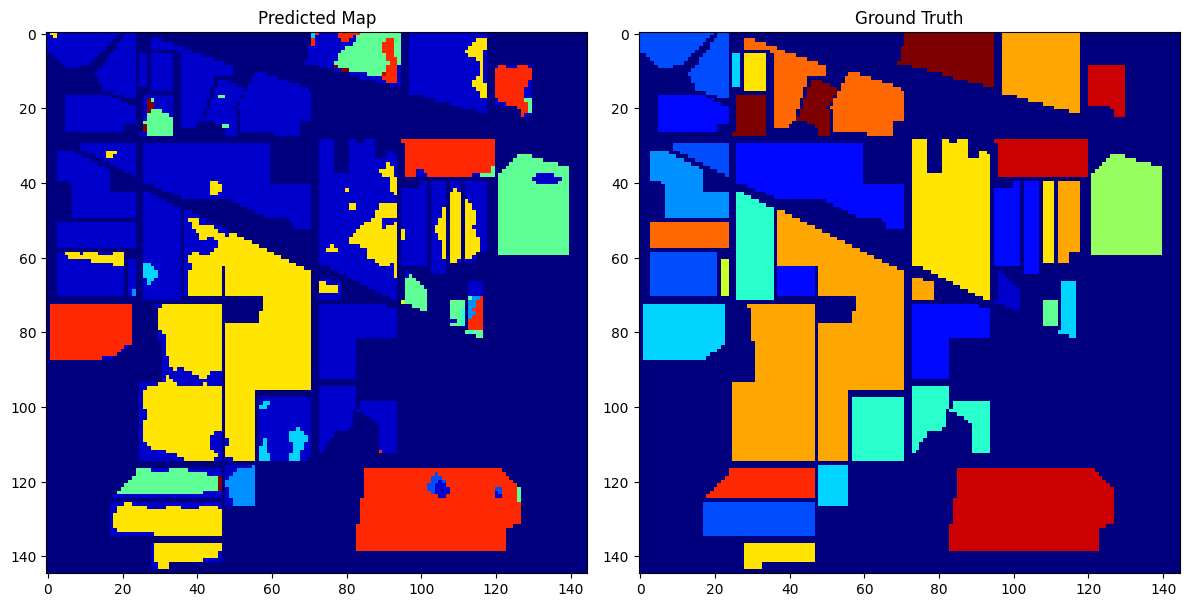

In [ ]:

# Make predictions using the CNN model
predictions = cnn_model.predict(concat_input_expanded)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Reshape predicted_labels to match the shape of the ground truth map
predicted_map = np.zeros_like(indian_pines_gt)
for idx, (row, col) in enumerate(zip(concat_rows, concat_cols)):
    predicted_map[row, col] = predicted_labels[idx]

# Visualize the predicted map and ground truth map
visualize_classification_map(predicted_map, indian_pines_gt)

